In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import Weed config
sys.path.append(os.path.join(ROOT_DIR, "samples/"))  # To find local version
import Weed_retrain

%matplotlib inline 

# Local path to trained weights file
MODEL_PATH = os.path.join(ROOT_DIR, "Farmer/farmer-jiaqi/jiaqi-model.h5")

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "Farmer/farmer-jiaqi/images")

# Directory of saving detection results
RESULTS_DIR = os.path.join(ROOT_DIR, "results")

/home/jiaqihan1108/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class InferenceConfig(Weed_retrain.ShapesConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  64
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_PATH, config=config)

# Load weights trained on model
model.load_weights(MODEL_PATH, by_name=True)

In [4]:
# Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG','Weed']

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  137.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  800.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -1.06274  max:    1.93749  float32


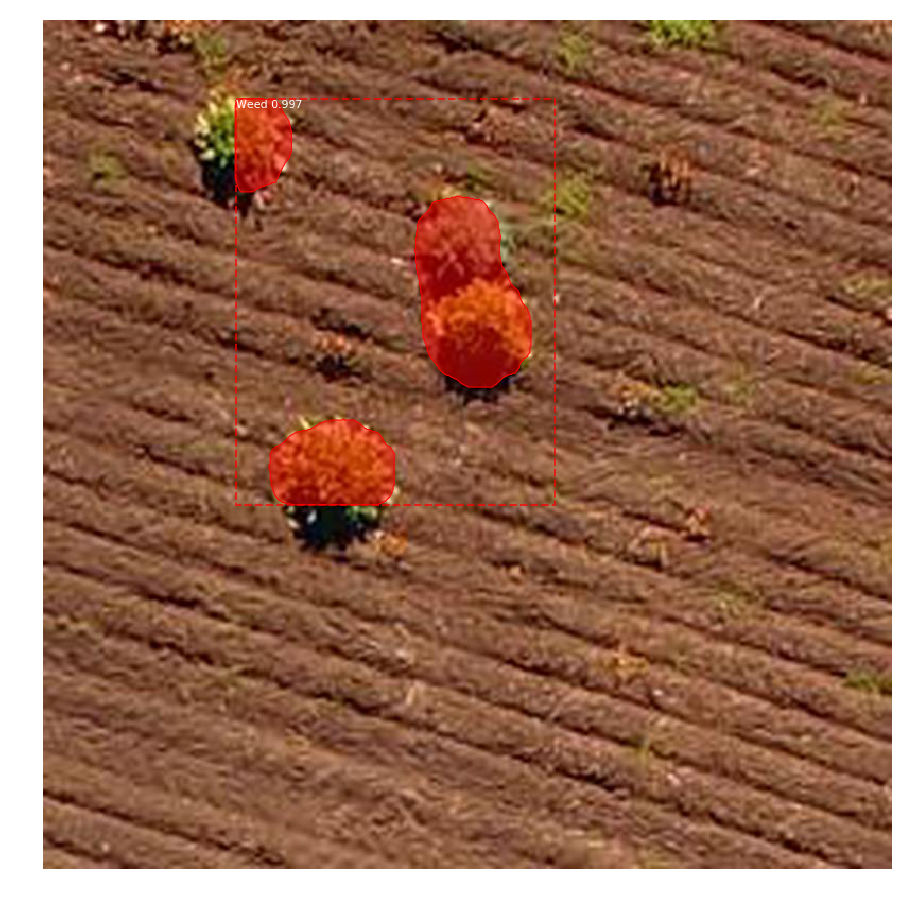

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  134.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  800.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -1.06274  max:    1.93749  float32


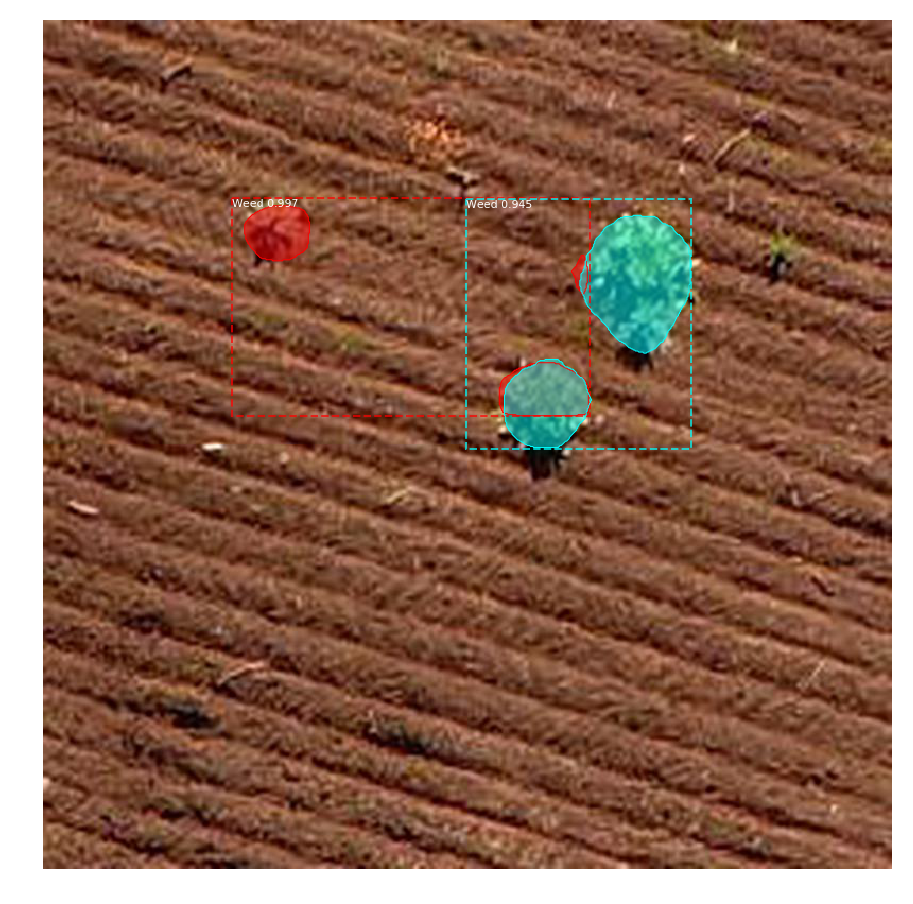

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  137.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  800.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -1.06274  max:    1.93749  float32


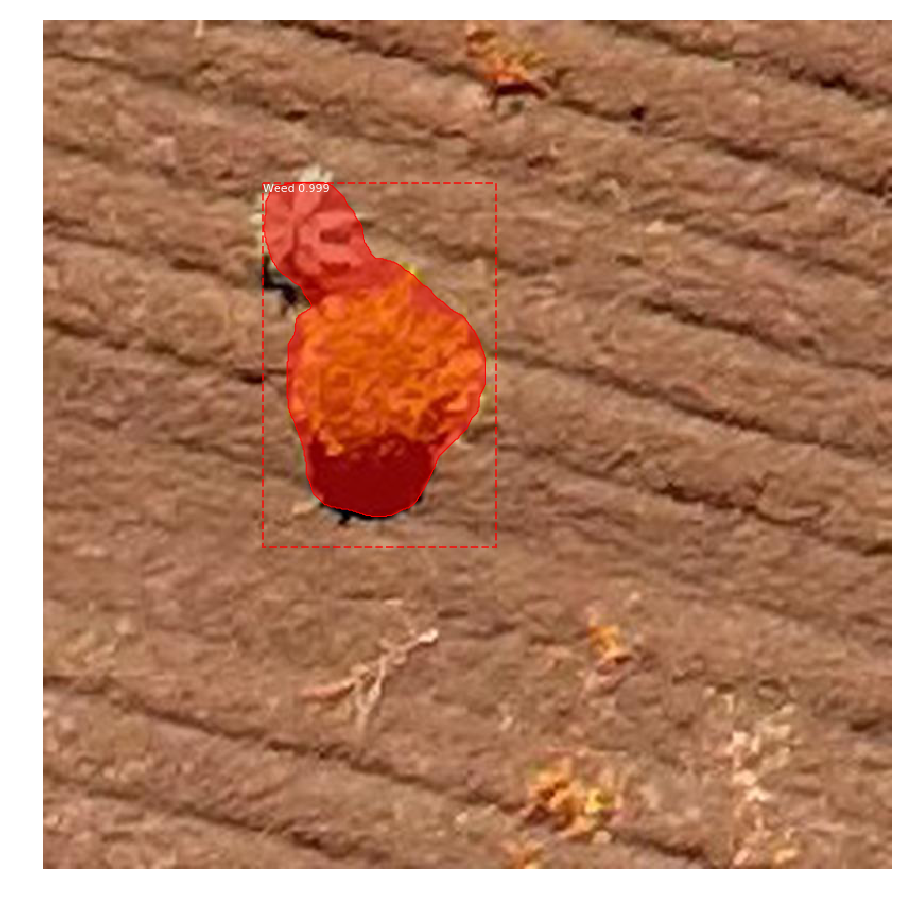

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  138.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  800.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -1.06274  max:    1.93749  float32


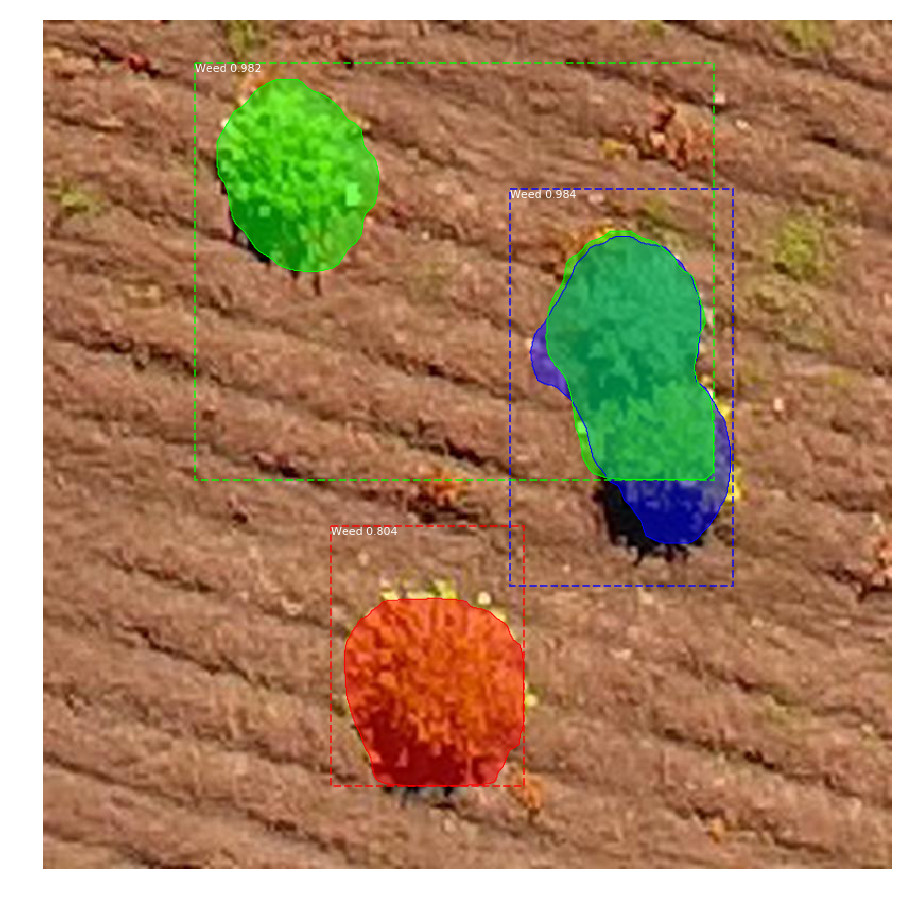

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  800.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -1.06274  max:    1.93749  float32


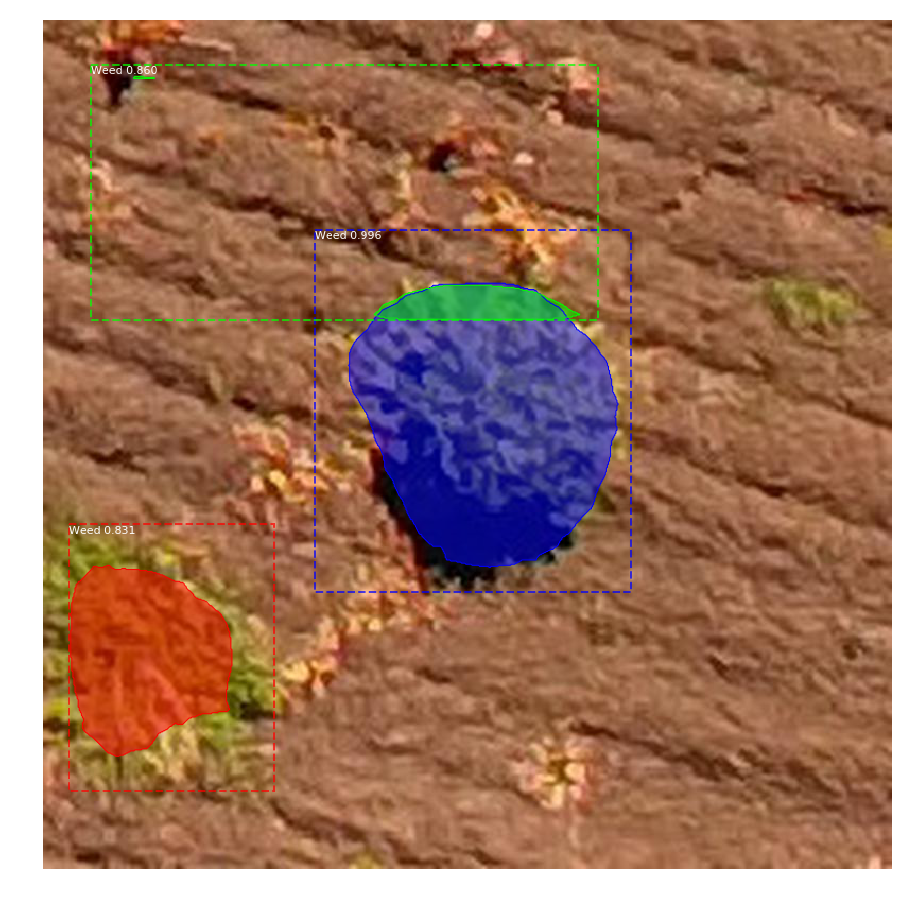

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  800.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -1.06274  max:    1.93749  float32


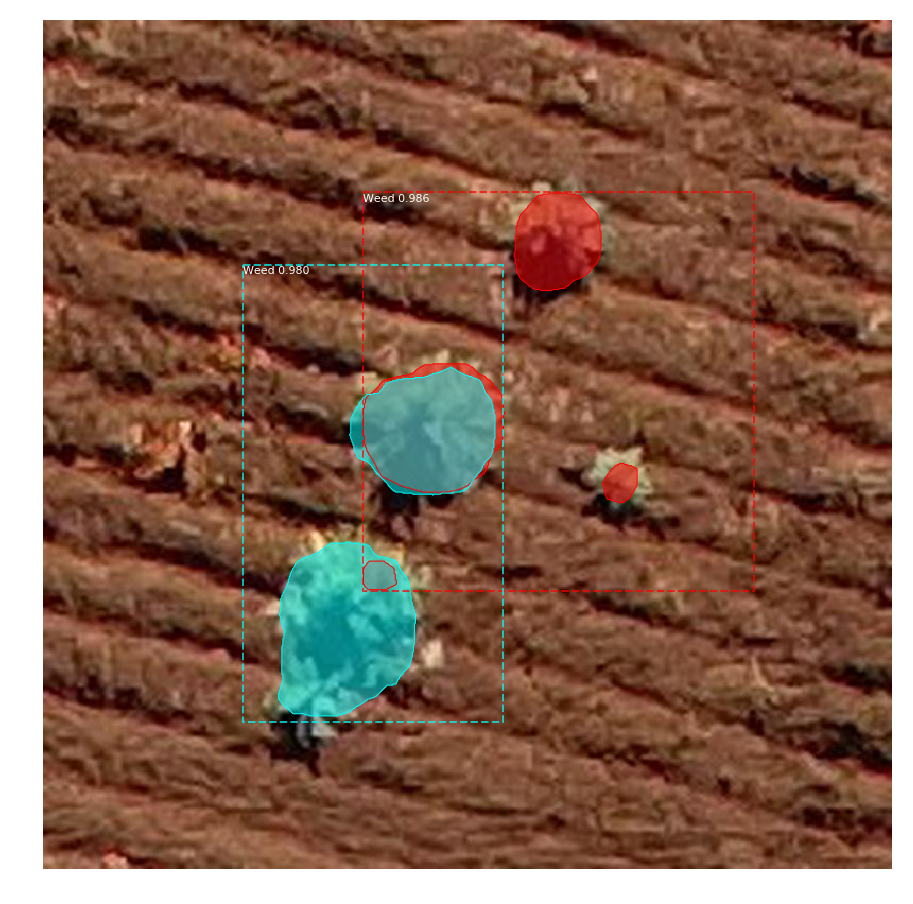

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  138.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  800.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -1.06274  max:    1.93749  float32


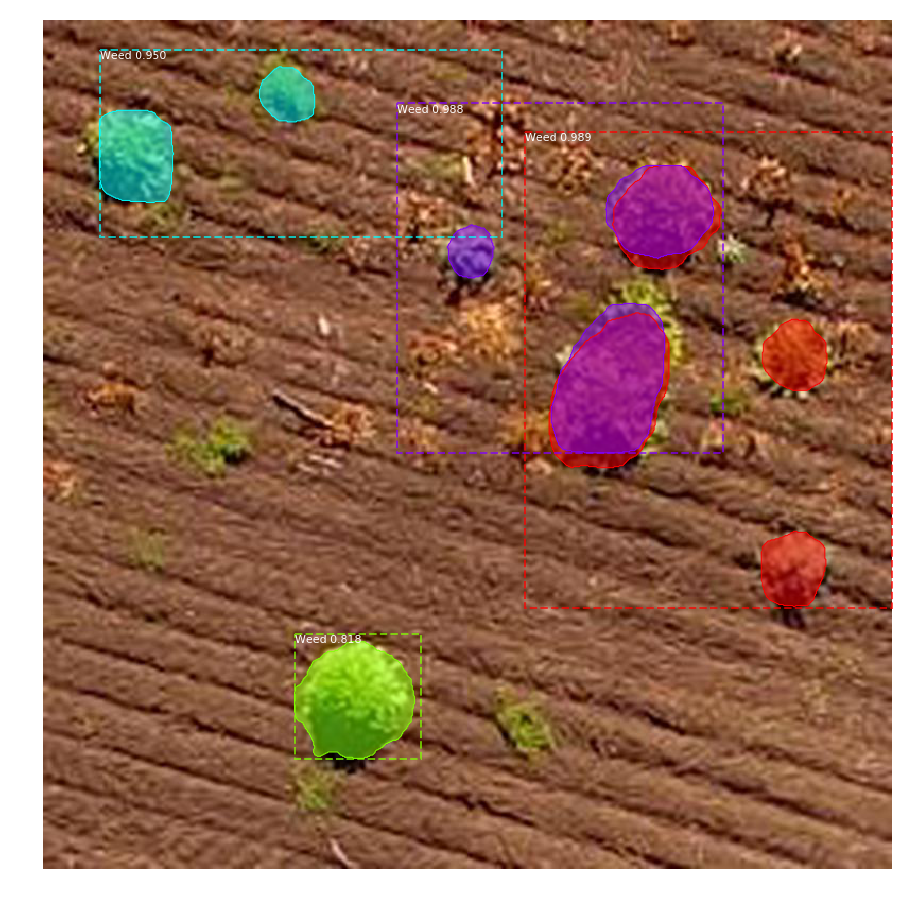

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  132.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  800.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -1.06274  max:    1.93749  float32


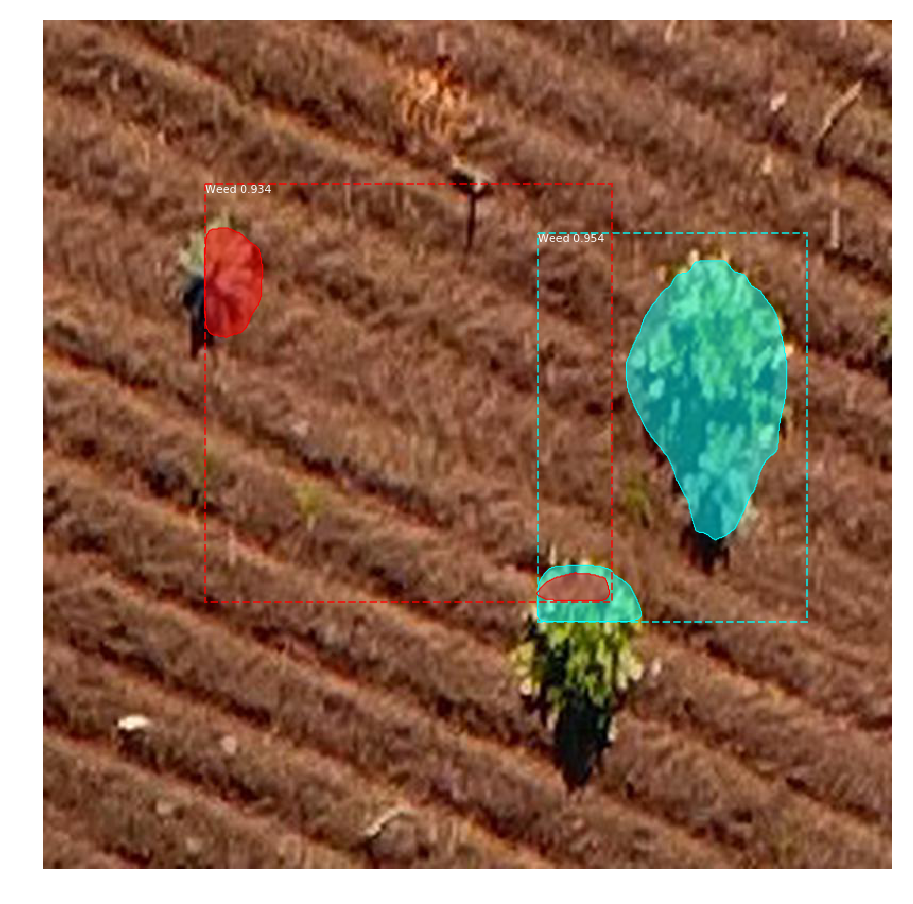

In [5]:
count = os.listdir(IMAGE_DIR)
for i in range(0,len(count)):
    path = os.path.join(IMAGE_DIR, count[i])
    if os.path.isfile(path):
        file_names = next(os.walk(IMAGE_DIR))[2]
        image = skimage.io.imread(os.path.join(IMAGE_DIR, count[i]))
        # Run detection
        results = model.detect([image], verbose=1)
        # Visualize results
        r = results[0]
        visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
